In [8]:
import os.path as os
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import mne
from mne.time_frequency import tfr_morlet

In [9]:

epochs_file = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\sub2\\epochs\\encoding_epochs_bl_None.fif'
epochs = mne.read_epochs(epochs_file).pick_types(meg='grad')

freqs = np.logspace(*np.log10([3, 90]), num=25)
n_cycles = freqs / 2.  # different number of cycle per frequency

power = tfr_morlet(epochs['hits'], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        decim=3, n_jobs=10, return_itc=False)


Reading D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\epochs\encoding_epochs_bl_None.fif ...
    Found the data of interest:
        t =   -1500.00 ...    3995.00 ms
        0 CTF compensation matrices available


C:\Users\CCDM\AppData\Local\Temp\ipykernel_6876\213876246.py:2: RuntimeWarning: This filename (D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\epochs\encoding_epochs_bl_None.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_file).pick_types(meg='grad').subtract_evoked()


Not setting metadata
210 matching events found
No baseline correction applied
0 projection items activated
Subtracting Evoked from Epochs
[done]


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done  94 tasks      | elapsed:    1.9s
[Parallel(n_jobs=10)]: Done 204 out of 204 | elapsed:    2.9s finished


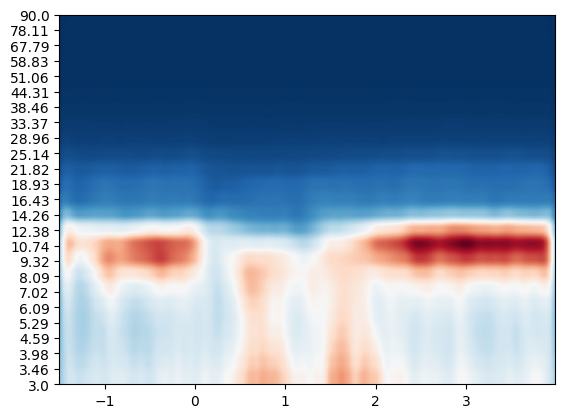

In [11]:
def plot_tfa(
    power: mne.time_frequency.AverageTFR,
    cmap: Optional[str | m.colors.Colormap] = 'RdBu_r',
) -> m.figure.Figure:

    fig, ax = plt.subplots(1,1)
    ax.imshow(
        power.data.mean(0), aspect='auto', origin='lower', cmap=cmap,
        extent=(power.times[0], power.times[-1], power.freqs[0], power.freqs[-1])
    )
    ax.set_yticks(np.linspace(power.freqs[0], power.freqs[-1], power.freqs.shape[0]))
    ax.set_yticklabels(np.round(freqs, 2))

    return fig

fig = plot_tfa(power)

In [6]:
type(fig)

matplotlib.figure.Figure